In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft

In [311]:
Omega = 2*np.pi
beta=2

In [343]:
N = 1;T=.28; Nt=200;Nx =100
a = 1; L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)
def RHS_linear_diffusion_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -np.cos(Omega*t)*fft.ifft(n**2*(2*np.pi/L)**2*fft.fft(y)).real
    return dydt
def RHS_linear_transport_pseudo_spectral(t,y):
    N = len(y)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    dydt = -a*fft.ifft(n*(2*np.pi/L)*1j*fft.fft(y)).real
    return dydt

In [344]:
u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_linear_diffusion_pseudo_spectral, t_span,u0, 'BDF',atol = 1e-7,t_eval =t)
u = result_ivp.y

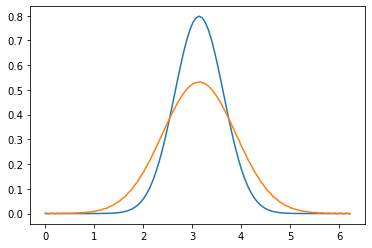

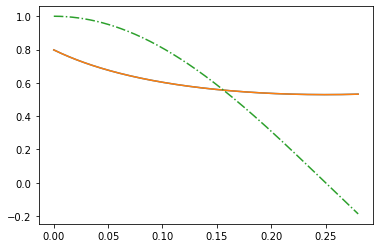

In [345]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()
plt.plot(t, np.max(u, axis=0))
plt.plot(t, np.sqrt(beta/np.pi)*1/np.sqrt(4*beta/Omega*np.sin(Omega*t)+1))
plt.plot(t, np.cos(Omega*t), '-.')

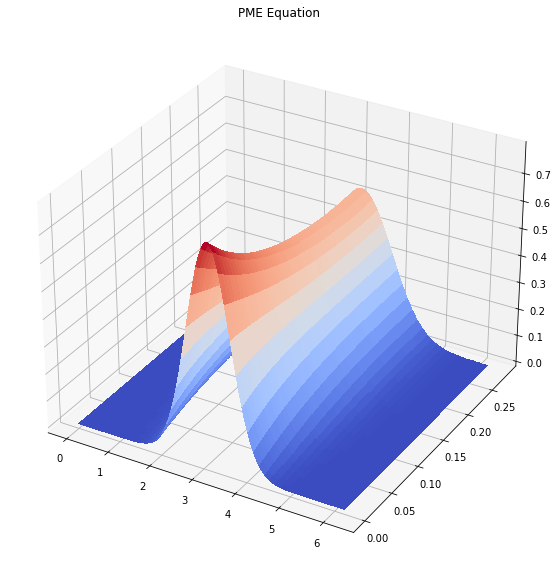

In [346]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME Equation')
plt.show()

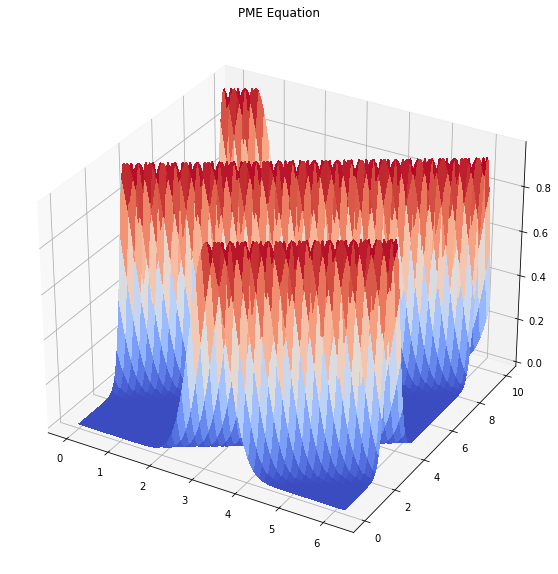

In [355]:
#transport
Omega = 2*np.pi; beta=3
N = 1;T=10; Nt=2000;Nx =100
a = 1; L = np.pi*2
dx = L/Nx
t = np.linspace(0,T, Nt)
t_span = (0, T)
y = np.zeros((len(nodes), Nt))
x = np.linspace(0,L-dx,Nx)
X, T = np.meshgrid(x,t)

u0 = np.exp(-beta*(x-L/2)**2)*np.sqrt(beta/np.pi)
result_ivp = scipy.integrate.solve_ivp(RHS_linear_transport_pseudo_spectral, t_span,u0, 'RK45',atol = 1e-7,t_eval =t)
u = result_ivp.y
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME Equation')
plt.show()

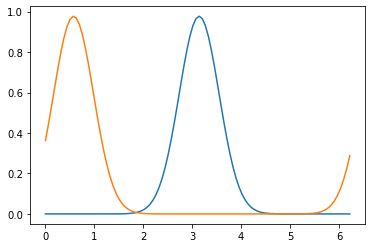

In [356]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.show()